# Question 1: Convert covariance matrix into correlation matrix using numpy

1A Answer: Covariance and correlation both show how two factors are related to eachother:  

- **Covariance** tells you if the two factors move together (positive) or in opposite directions (negative). But it doesn’t say how strong the relationship is.  

- **Correlation** is like a cleaner version of covariance. It shows both the direction and the strength of the relationship on a scale from -1 to 1, so it’s easier to understand.  

Custom Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

NumPy Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

Are the covariance matrices (basically) equal? True
Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close

Custom Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]

NumPy Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.871

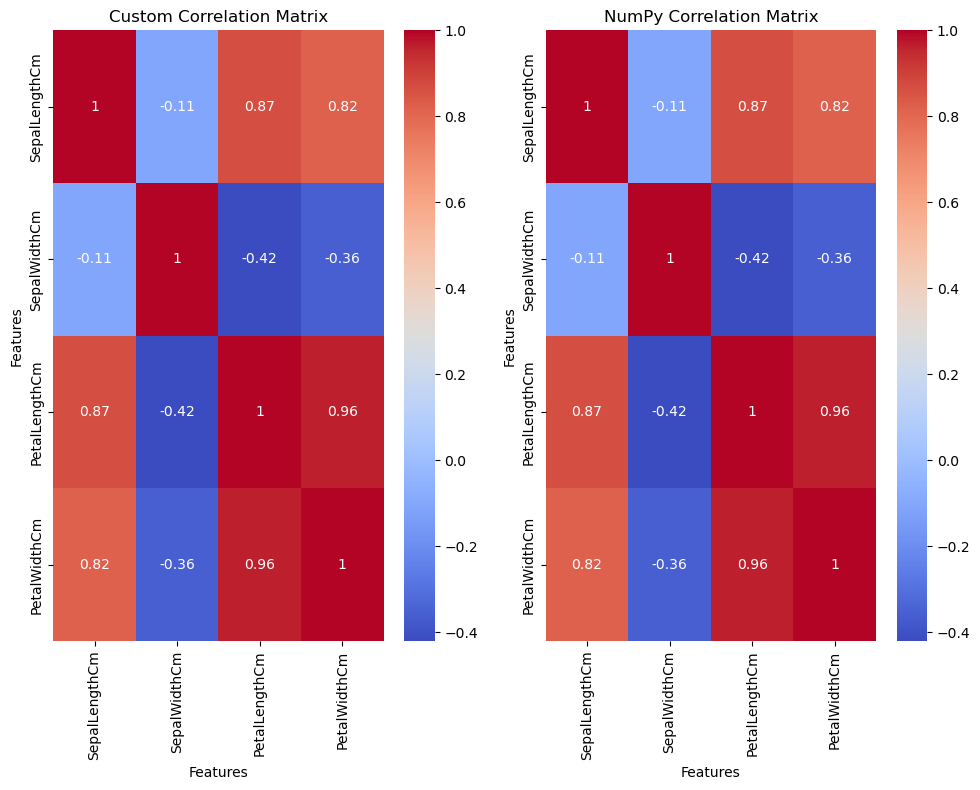

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1B ANSWER: Load the Iris dataset
iris_data = pd.read_csv("Iris.csv")
numerical_features = iris_data.iloc[:, 1:-1]

# 1C-a ANSWER: A function to calculate the covariance between two variables
def calculate_covariance(feature_x, feature_y):
    mean_x = np.mean(feature_x)
    mean_y = np.mean(feature_y)
    covariance = np.sum((feature_x - mean_x) * (feature_y - mean_y)) / (len(feature_x) - 1)
    return covariance

# 1C-b ANSWER: A function to compute the Covariance matrix
def compute_covariance_matrix(data):
    num_features = data.shape[1]
    covariance_matrix = np.zeros((num_features, num_features))
    
    for i in range(num_features):
        for j in range(num_features):
            covariance_matrix[i][j] = calculate_covariance(data.iloc[:, i], data.iloc[:, j])
    
    return covariance_matrix

# 1D ANSWER: Compare the results of your function with NumPy's np.cov
custom_covariance_matrix = compute_covariance_matrix(numerical_features)
numpy_covariance_matrix = np.cov(numerical_features, rowvar=False)

# Print Results
print("Custom Covariance Matrix:")
print(custom_covariance_matrix)

print("\nNumPy Covariance Matrix:")
print(numpy_covariance_matrix)

# Verify if both matrices are equal
print("\nAre the covariance matrices (basically) equal?", np.allclose(custom_covariance_matrix, numpy_covariance_matrix))
#Note: Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close
print("Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close")

# 1E ANSWER: A function to compute the Correlation matrix
def compute_correlation_matrix(data):
    covariance_matrix = compute_covariance_matrix(data)
    standard_deviations = np.sqrt(np.diag(covariance_matrix))
    
    num_features = data.shape[1]
    correlation_matrix = np.zeros((num_features, num_features))
    
    for i in range(num_features):
        for j in range(num_features):
            correlation_matrix[i][j] = covariance_matrix[i][j] / (standard_deviations[i] * standard_deviations[j])
    
    return correlation_matrix

# 1F ANSWER: Test2: Validate the correlation matrix implementation
custom_correlation_matrix = compute_correlation_matrix(numerical_features)
numpy_correlation_matrix = np.corrcoef(numerical_features, rowvar=False)

# Print Results
print("\nCustom Correlation Matrix:")
print(custom_correlation_matrix)

print("\nNumPy Correlation Matrix:")
print(numpy_correlation_matrix)

# Verify if both matrices are equal
print("\nAre the correlation matrices (basically) equal?", np.allclose(custom_correlation_matrix, numpy_correlation_matrix))
#Note: Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close
print("Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close")

# 1G ANSWER: Visualization to communicate the results
plt.figure(figsize=(10, 8))

# Heatmap for custom correlation matrix
plt.subplot(1, 2, 1)
sns.heatmap(custom_correlation_matrix, annot=True, cmap="coolwarm", xticklabels=numerical_features.columns, yticklabels=numerical_features.columns)
plt.title("Custom Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Heatmap for NumPy correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(numpy_correlation_matrix, annot=True, cmap="coolwarm", xticklabels=numerical_features.columns, yticklabels=numerical_features.columns)
plt.title("NumPy Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

plt.tight_layout()
plt.show()


# Question 2: Laptop Price Dataset Analysis

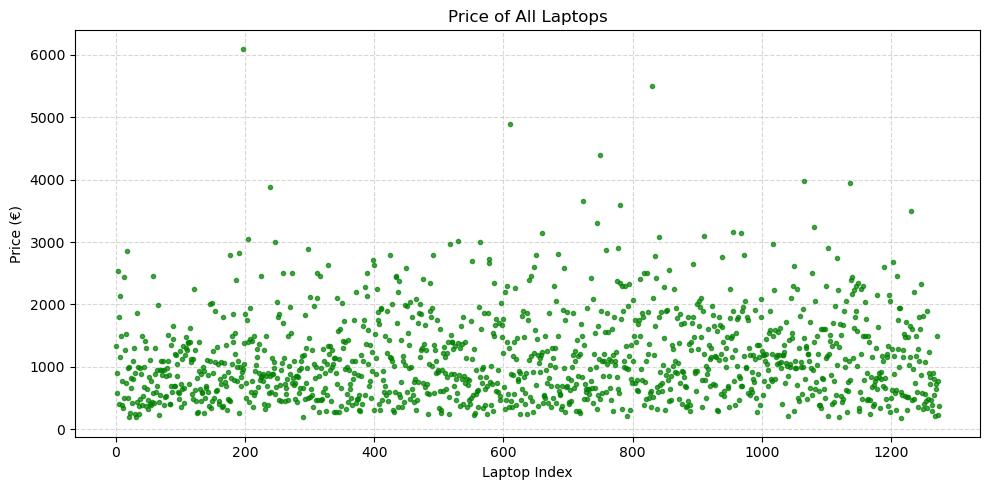

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
data = pd.read_csv("laptop_price - dataset.csv")
data.columns = data.columns.str.strip().str.lower()  # Strip spaces and lowercase column names

# 1. Plot all laptop prices
plt.figure(figsize=(10, 5))
plt.plot(data['price (euro)'], marker='.', linestyle='', color='green', alpha=0.7)
plt.title("Price of All Laptops")
plt.xlabel("Laptop Index")
plt.ylabel("Price (€)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Average Laptop Price by Company:
company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: price (euro), dtype: float64


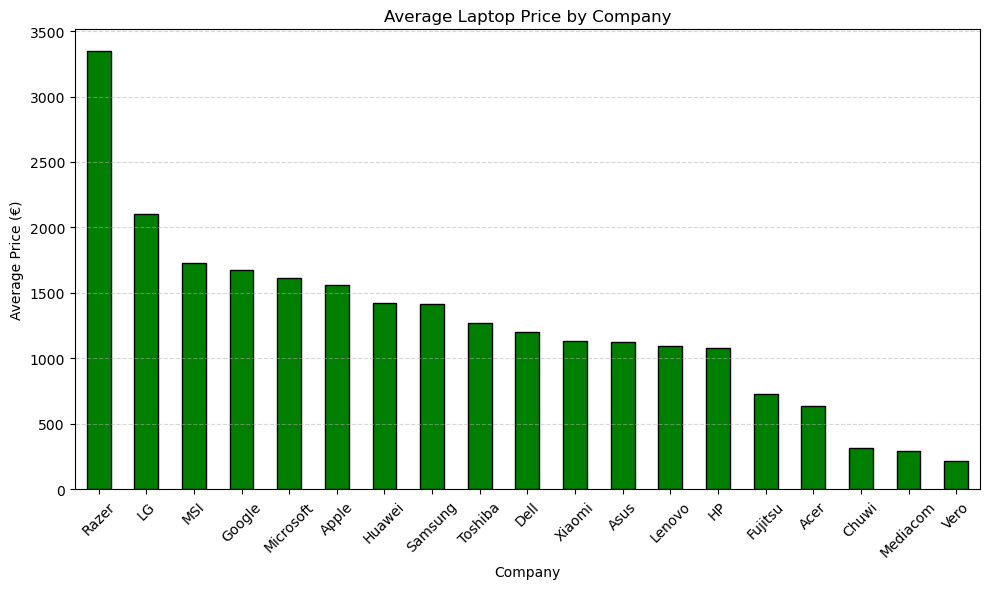

In [27]:

# 2. Average price per company
avg_price = data.groupby('company')['price (euro)'].mean().sort_values(ascending=False)

# Print the average price of each company's laptops
print("Average Laptop Price by Company:")
print(avg_price)

# Plot average price
plt.figure(figsize=(10, 6))
avg_price.plot(kind='bar', color='green', edgecolor='black')
plt.title("Average Laptop Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


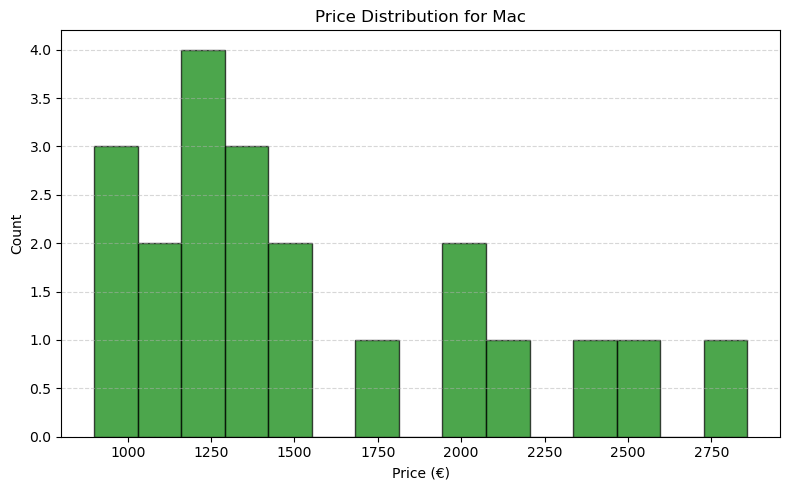

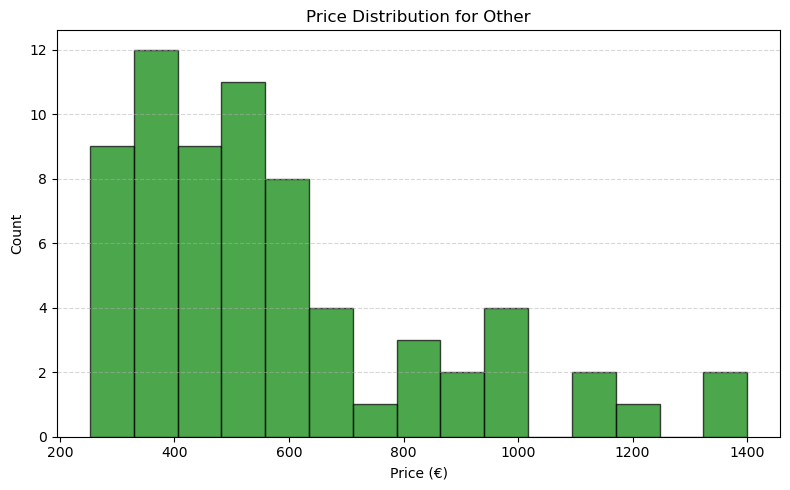

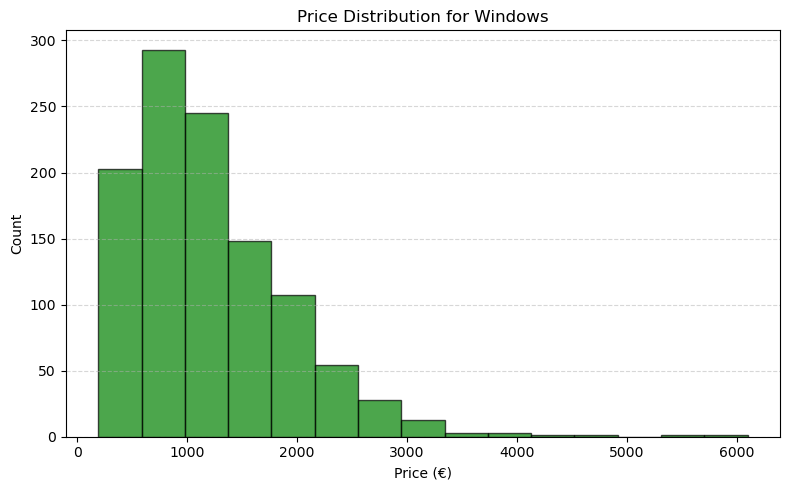

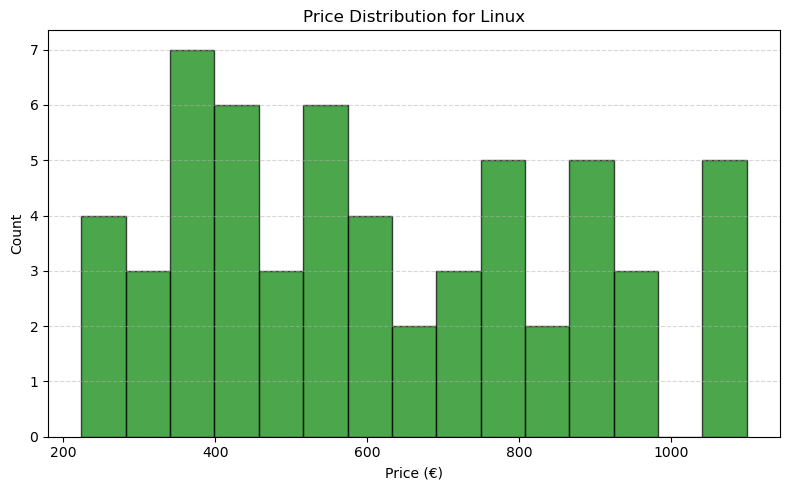

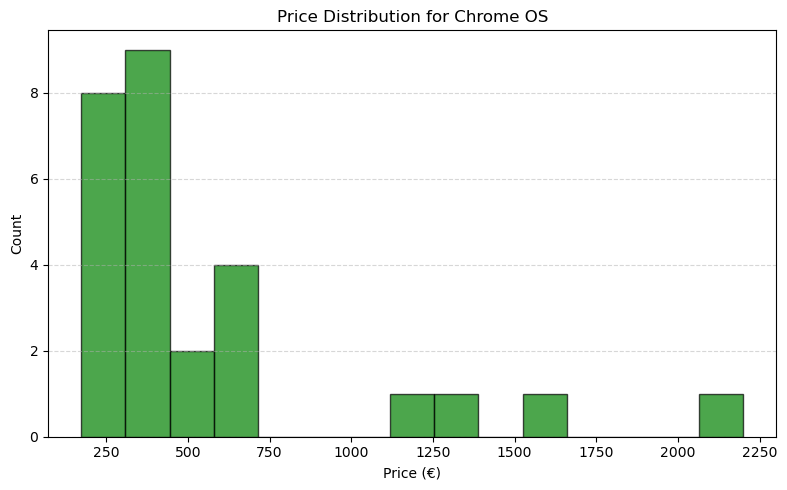

In [28]:

# Clean 'opsys' column for OS categorization
def clean_opsys(os):
    os = os.lower()
    if 'windows' in os:
        return 'Windows'
    elif 'mac' in os or 'os x' in os:
        return 'Mac'
    elif 'linux' in os:
        return 'Linux'
    elif 'chrome' in os:
        return 'Chrome OS'
    else:
        return 'Other'

data['opsys_cleaned'] = data['opsys'].apply(clean_opsys)

# Plot price distribution for each OS
for os in data['opsys_cleaned'].unique():
    plt.figure(figsize=(8, 5))
    subset = data[data['opsys_cleaned'] == os]
    plt.hist(subset['price (euro)'], bins=15, color='green', edgecolor='black', alpha=0.7)
    plt.title(f"Price Distribution for {os}")
    plt.xlabel("Price (€)")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


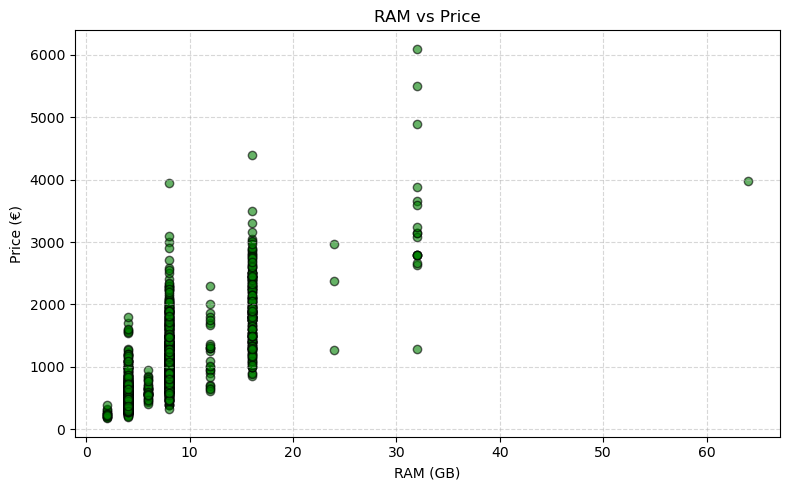

In [29]:

# RAM vs Price relationship
plt.figure(figsize=(8, 5))
plt.scatter(data['ram (gb)'], data['price (euro)'], color='green', alpha=0.6, edgecolor='black')
plt.title("RAM vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (€)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


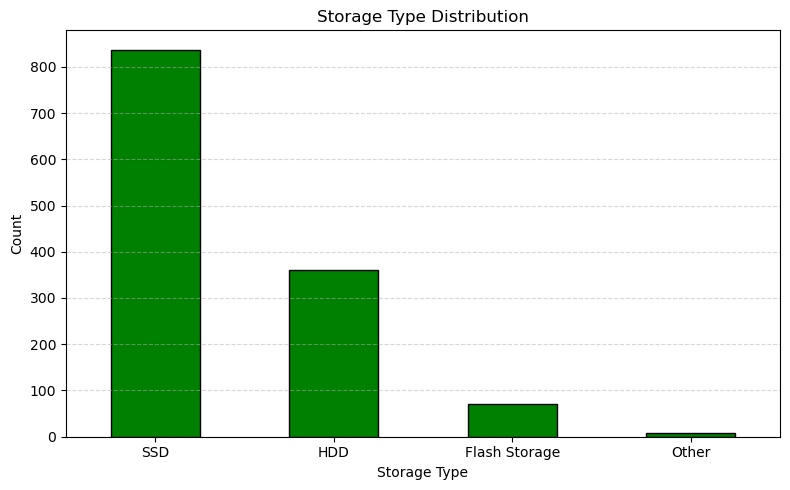

In [30]:

# 5. Extract storage types and analyze
def extract_storage(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Flash Storage' in memory:
        return 'Flash Storage'
    else:
        return 'Other'

data['storage_type'] = data['memory'].apply(extract_storage)

# Bar plot for storage types
storage_count = data['storage_type'].value_counts()
plt.figure(figsize=(8, 5))
storage_count.plot(kind='bar', color='green', edgecolor='black')
plt.title("Storage Type Distribution")
plt.xlabel("Storage Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Question 3: Additional Plots

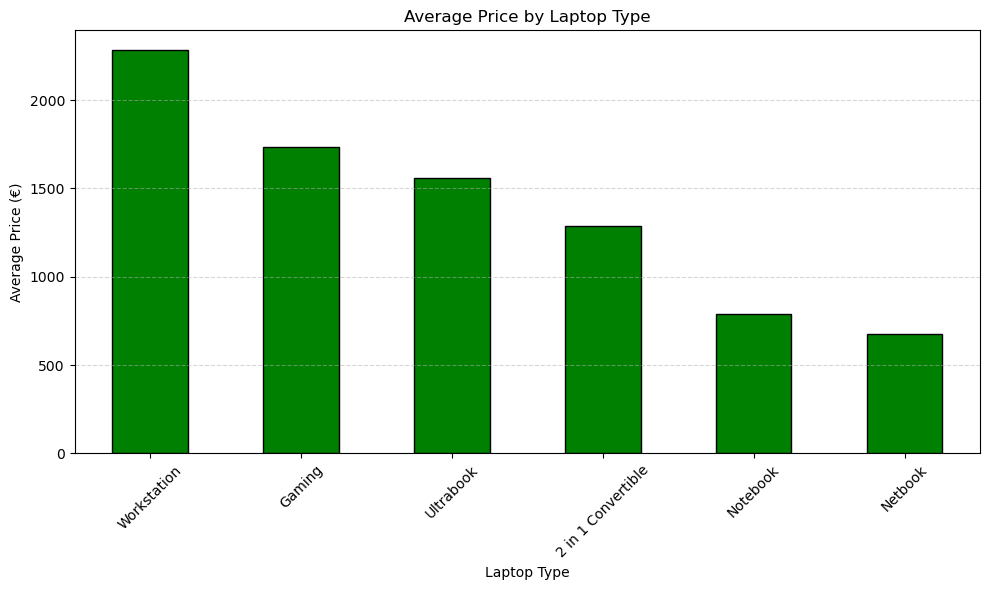

In [17]:
plt.figure(figsize=(10, 6))
data.groupby('typename')['price (euro)'].mean().sort_values(ascending=False).plot(kind='bar', color='green', edgecolor='black')
plt.title("Average Price by Laptop Type")
plt.xlabel("Laptop Type")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


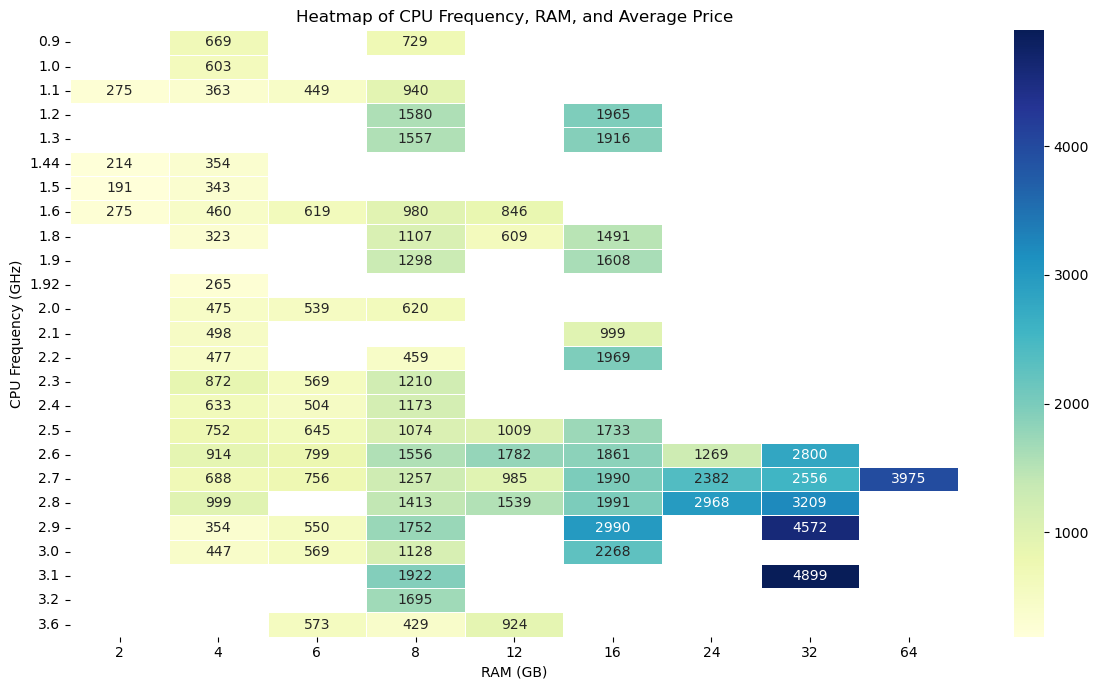

In [22]:
heatmap_data = data.pivot_table(values='price (euro)',
                                index='cpu_frequency (ghz)',
                                columns='ram (gb)',
                                aggfunc='mean')

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of CPU Frequency, RAM, and Average Price")
plt.xlabel("RAM (GB)")
plt.ylabel("CPU Frequency (GHz)")
plt.tight_layout()
plt.show()
